# EDA of Credit Scoring

## 1. Load relevent libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## 2. Data Loading

In [2]:
DATA_DIR = './'
DATA = 'cleaned_train.csv'

In [3]:
df = pd.read_csv(os.path.join(DATA_DIR, DATA))
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard


## 3. Cleaning Process I

### - 중복 컬럼 제거

In [4]:
drop_cols = ['Name', 'SSN']
cleaned_df = df.drop(drop_cols, axis=1)

### - 대출 상품 리스트 분리

In [5]:
cleaned_df['Type_of_Loan'][9]

'Credit-Builder Loan'

In [6]:
cleaned_df['Type_of_Loan'].str.split(',')

0        [Auto Loan,  Credit-Builder Loan,  Personal Lo...
1        [Auto Loan,  Credit-Builder Loan,  Personal Lo...
2        [Auto Loan,  Credit-Builder Loan,  Personal Lo...
3        [Auto Loan,  Credit-Builder Loan,  Personal Lo...
4        [Auto Loan,  Credit-Builder Loan,  Personal Lo...
                               ...                        
99995                       [Auto Loan,  and Student Loan]
99996                       [Auto Loan,  and Student Loan]
99997                       [Auto Loan,  and Student Loan]
99998                       [Auto Loan,  and Student Loan]
99999                       [Auto Loan,  and Student Loan]
Name: Type_of_Loan, Length: 100000, dtype: object

In [7]:
import re

In [8]:
search = ' and '
space = ' '

In [9]:
def search_and_remove(li, search_word):

    for i, word in enumerate(li):
        if search_word in word:
            li[i] = re.sub(search_word, '', word)
            # li[i] = re.sub(space, '', word)
        # else:
            # li[i] = re.sub(space, '', word)
    return li

def white_space_remover(li, ws):

    for i, word in enumerate(li):
        if ws in word:
            li[i] = re.sub(ws, '', word)
    return li

In [10]:
search_and_remove(['Auto Loan',  'Credit-Builder Loan',  'Personal Loan',  ' and Home Equity Loan'], search)

['Auto Loan', 'Credit-Builder Loan', 'Personal Loan', 'Home Equity Loan']

In [11]:
cleaned_df['Type_of_Loan'] = cleaned_df['Type_of_Loan'].str.split(',').apply(lambda x :  search_and_remove(x, search))
cleaned_df['Type_of_Loan'] = cleaned_df['Type_of_Loan'].apply(lambda x :  white_space_remover(x, space))

In [12]:
cleaned_df['Type_of_Loan']

0        [AutoLoan, Credit-BuilderLoan, PersonalLoan, H...
1        [AutoLoan, Credit-BuilderLoan, PersonalLoan, H...
2        [AutoLoan, Credit-BuilderLoan, PersonalLoan, H...
3        [AutoLoan, Credit-BuilderLoan, PersonalLoan, H...
4        [AutoLoan, Credit-BuilderLoan, PersonalLoan, H...
                               ...                        
99995                              [AutoLoan, StudentLoan]
99996                              [AutoLoan, StudentLoan]
99997                              [AutoLoan, StudentLoan]
99998                              [AutoLoan, StudentLoan]
99999                              [AutoLoan, StudentLoan]
Name: Type_of_Loan, Length: 100000, dtype: object

In [13]:
cleaned_df['Type_of_Loan'][0]

['AutoLoan', 'Credit-BuilderLoan', 'PersonalLoan', 'HomeEquityLoan']

In [14]:
type_of_loans = cleaned_df['Type_of_Loan']

In [15]:
pd.get_dummies(type_of_loans.apply(pd.Series).stack()).sum(axis=1)

0      0    1
       1    1
       2    1
       3    1
1      0    1
           ..
99997  1    1
99998  0    1
       1    1
99999  0    1
       1    1
Length: 364696, dtype: int64

In [20]:
# OHE for Loan Types
loan_dummy_df = pd.get_dummies(type_of_loans.apply(pd.Series).stack()).sum(level=0)
loan_dummy_df

/var/folders/rm/1g600byx25b_ht2r9ty6b4_00000gn/T/ipykernel_25995/4009385760.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  loan_dummy_df = pd.get_dummies(type_of_loans.apply(pd.Series).stack()).sum(level=0)


,AutoLoan,Credit-BuilderLoan,DebtConsolidationLoan,HomeEquityLoan,MortgageLoan,NoData,NotSpecified,PaydayLoan,PersonalLoan,StudentLoan
0,1,1,0,1,0,0,0,0,1,0
1,1,1,0,1,0,0,0,0,1,0
2,1,1,0,1,0,0,0,0,1,0
3,1,1,0,1,0,0,0,0,1,0
4,1,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
99995,1,0,0,0,0,0,0,0,0,1
99996,1,0,0,0,0,0,0,0,0,1
99997,1,0,0,0,0,0,0,0,0,1
99998,1,0,0,0,0,0,0,0,0,1


In [17]:
# OHE 연결
cleaned_df = pd.concat([cleaned_df, loan_dummy_df], axis=1)
cleaned_df

,ID,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,AutoLoan,Credit-BuilderLoan,DebtConsolidationLoan,HomeEquityLoan,MortgageLoan,NoData,NotSpecified,PaydayLoan,PersonalLoan,StudentLoan
0,5634,3392,1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,1,1,0,1,0,0,0,0,1,0
1,5635,3392,2,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,1,1,0,1,0,0,0,0,1,0
2,5636,3392,3,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,1,1,0,1,0,0,0,0,1,0
3,5637,3392,4,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,1,1,0,1,0,0,0,0,1,0
4,5638,3392,5,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,1,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,...,1,0,0,0,0,0,0,0,0,1
99996,155626,37932,5,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,...,1,0,0,0,0,0,0,0,0,1
99997,155627,37932,6,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,...,1,0,0,0,0,0,0,0,0,1
99998,155628,37932,7,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,...,1,0,0,0,0,0,0,0,0,1


In [18]:
# cleaned_df = pd.concat([cleaned_df, loan_dummy_df], axis=1)
cols = cleaned_df.columns.tolist()
y_index = cols.index('Credit_Score')
new_cols = cols[:y_index] + cols[y_index + 1: ] + cols[y_index].split()
new_cols

['ID',
 'Customer_ID',
 'Month',
 'Age',
 'Occupation',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Type_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Credit_Mix',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Payment_Behaviour',
 'Monthly_Balance',
 'AutoLoan',
 'Credit-BuilderLoan',
 'DebtConsolidationLoan',
 'HomeEquityLoan',
 'MortgageLoan',
 'NoData',
 'NotSpecified',
 'PaydayLoan',
 'PersonalLoan',
 'StudentLoan',
 'Credit_Score']

In [19]:
cleaned_df = cleaned_df[new_cols]
cleaned_df

,ID,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Credit-BuilderLoan,DebtConsolidationLoan,HomeEquityLoan,MortgageLoan,NoData,NotSpecified,PaydayLoan,PersonalLoan,StudentLoan,Credit_Score
0,5634,3392,1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,1,0,1,0,0,0,0,1,0,Good
1,5635,3392,2,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,1,0,1,0,0,0,0,1,0,Good
2,5636,3392,3,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,1,0,1,0,0,0,0,1,0,Good
3,5637,3392,4,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,1,0,1,0,0,0,0,1,0,Good
4,5638,3392,5,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,1,0,1,0,0,0,0,1,0,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,...,0,0,0,0,0,0,0,0,1,Poor
99996,155626,37932,5,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,...,0,0,0,0,0,0,0,0,1,Poor
99997,155627,37932,6,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,...,0,0,0,0,0,0,0,0,1,Poor
99998,155628,37932,7,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,...,0,0,0,0,0,0,0,0,1,Standard


## 4. EDA

### 1) Customer View Point

In [21]:
# 총 고객 수
cleaned_df['Customer_ID'].nunique()

12500

In [22]:
cleaned_df.groupby('Customer_ID', group_keys=True)['Credit_Score'].apply(lambda x : x[:10])

/var/folders/rm/1g600byx25b_ht2r9ty6b4_00000gn/T/ipykernel_25995/2544113446.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  cleaned_df.groupby('Customer_ID', group_keys=True)['Credit_Score'].apply(lambda x : x[:10])


Customer_ID       
1006         14744    Poor
             14745    Poor
             14746    Poor
             14747    Poor
             14748    Poor
                      ... 
50999        54219    Good
             54220    Good
             54221    Good
             54222    Good
             54223    Good
Name: Credit_Score, Length: 100000, dtype: object

### 2) Label Dictionary of Credit Score

In [23]:
np.unique(cleaned_df['Credit_Score'])

array(['Good', 'Poor', 'Standard'], dtype=object)

Good > Standard > Poor 순으로 정렬 필요.

In [24]:
# label2idx 딕셔너리 생성
label2idx = {'Poor': 0, 'Standard': 1, 'Good': 2}

# cleaned_df['Credit_Score'].map(label2idx)
cleaned_df['Credit_Score'] = cleaned_df['Credit_Score'].map(label2idx)
cleaned_df['Credit_Score']

0        2
1        2
2        2
3        2
4        2
        ..
99995    0
99996    0
99997    0
99998    1
99999    0
Name: Credit_Score, Length: 100000, dtype: int64

In [25]:
# idx to label dictionary
idx2label = {}
for idx, value in label2idx.items():
    idx2label[value] = idx

idx2label

{0: 'Poor', 1: 'Standard', 2: 'Good'}

### 3) Pivot Table for the Change of Credit Score of Customers

- row : Customer
- column : Month
- values : Credit Score

In [26]:
pivot = pd.pivot(data=cleaned_df, index='Customer_ID', columns='Month', values='Credit_Score')
pivot

Month,1,2,3,4,5,6,7,8
Customer_ID,,,,,,,,
1006,0,0,0,0,0,0,0,0
1007,1,1,1,1,1,1,1,0
1008,1,1,1,1,1,1,1,1
1009,1,1,1,1,1,1,1,1
1011,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
50984,0,0,0,0,1,0,0,0
50990,0,0,1,0,0,0,0,0
50992,1,1,1,1,1,1,1,1


In [27]:
customer_id = pivot.index

In [28]:
def plot_8month_credit_score(pivot_tbl):
    plt.figure(figsize=(15, 5))
    plt.title('Credit Score Timeline of Each Customer', fontsize=15, y=1.05)
    # factor = 100
    for i in pivot_tbl.values:
        plt.plot(i)
        # factor += 0.01

    plt.xlabel('Month')
    # plt.ylabel('0: Poor, 1: Standard, 2: Good')
    # plt.ylim(0, 3)

    plt.show()

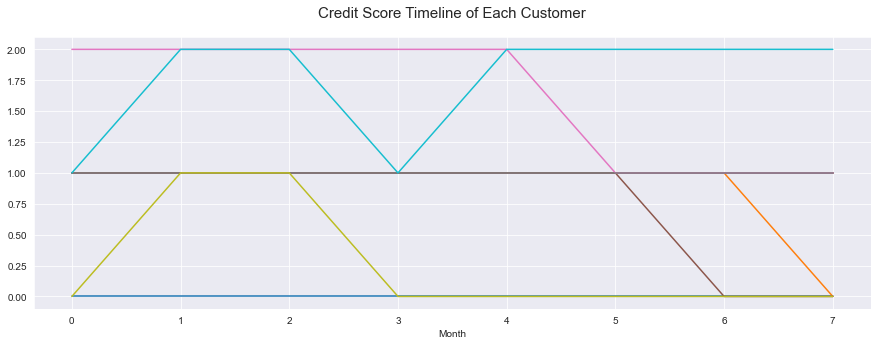

In [29]:
plot_8month_credit_score(pivot[:10])

### 4) Customers Having ever Changed Credit Score

#### First Difference : Ever Changed vs Negatively Changed vs Positively Changed

Check List:
- Credit Mix가 선행하는지,
- 대출의 개수는 늘었는지

이거 체크 필요

##### 신용 변동이 있었는가? (Ever Changed?)

In [30]:
# 상승이든 하락이든 변화가 있던 고객들 확인
credit_changes = np.diff(pivot, axis=1)
credit_changes

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0, -1],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]])

In [142]:
# 데이터 내 신용등급 변화 고객 아이디 추출
credit_changed_customer_list = np.abs(credit_changes).mean(axis=1) > 0
changed_customer_series = pd.Series(credit_changed_customer_list, index=customer_id)
changed_customer_series

Customer_ID
1006     False
1007      True
1008     False
1009     False
1011     False
         ...  
50984     True
50990     True
50992    False
50996    False
50999    False
Length: 12500, dtype: bool

In [147]:
changed_customer_id = changed_customer_series[ changed_customer_series == True].index
changed_customer_id

Int64Index([ 1007,  1013,  1014,  1017,  1019,  1029,  1039,  1041,  1043,
             1045,
            ...
            50946, 50957, 50958, 50962, 50965, 50966, 50975, 50983, 50984,
            50990],
           dtype='int64', name='Customer_ID', length=7292)

In [150]:
print(1006 in changed_customer_id)
print(1007 in changed_customer_id)

False
True


값 제대로 할당된 것 확인 완료

In [152]:
cleaned_df['credit_ever_changes'] = 0
cleaned_df.loc[ cleaned_df['Customer_ID'].isin(changed_customer_id), 'credit_ever_changes'] = 1
cleaned_df[['Customer_ID', 'credit_ever_changes']]

,Customer_ID,credit_ever_changes
0,3392,1
1,3392,1
2,3392,1
3,3392,1
4,3392,1
...,...,...
99995,37932,1
99996,37932,1
99997,37932,1
99998,37932,1


In [153]:
cleaned_df.groupby('credit_ever_changes')['Credit_Score'].describe()

,count,mean,std,min,25%,50%,75%,max
credit_ever_changes,,,,,,,,
0,41664.0,0.921275,0.512470,0.0,1.0,1.0,1.0,2.0
1,58336.0,0.864749,0.769689,0.0,0.0,1.0,1.0,2.0


In [36]:
idx2label

{0: 'Poor', 1: 'Standard', 2: 'Good'}

기본적으로 credit score가 변경되었던 고객보다 변경되지 않은 고객들의 credit score가 더 건강했음 (평균이 살짝 더 높음)
하지만 연봉 등과 같은 지표에서는 변동이 있던 고객이 더 높게 잡힘

##### 신용 하락이 있었는가?

In [154]:
credit_changes

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0, -1],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]])

In [155]:
credit_changes.shape

(12500, 7)

In [156]:
credit_changes[:, 0] == -1

array([False, False, False, ..., False, False, False])

In [157]:
first_period_negatively_changed = credit_changes[:, 0] == -1
first_period_negatively_changed

array([False, False, False, ..., False, False, False])

In [158]:
first_period_negatively_changed_customer_series = pd.Series(first_period_negatively_changed, index=customer_id)
first_period_negatively_changed_customer_series

Customer_ID
1006     False
1007     False
1008     False
1009     False
1011     False
         ...  
50984    False
50990    False
50992    False
50996    False
50999    False
Length: 12500, dtype: bool

In [159]:
first_period_negatively_changed_customer_id = first_period_negatively_changed_customer_series.loc[ first_period_negatively_changed == 1 ].index
first_period_negatively_changed_customer_id

Int64Index([ 1041,  1103,  1147,  1251,  1363,  1371,  1415,  1454,  1645,
             1752,
            ...
            50460, 50476, 50566, 50610, 50647, 50664, 50701, 50742, 50882,
            50883],
           dtype='int64', name='Customer_ID', length=766)

In [160]:
print(1645 in first_period_negatively_changed_customer_id)
print(1653 in first_period_negatively_changed_customer_id)

True
False


In [161]:
cleaned_df.loc[ cleaned_df['Customer_ID'].isin(first_period_negatively_changed_customer_id), ['Credit_Mix', 'Num_Credit_Inquiries', 'Num_of_Loan', 'Num_Credit_Card', 'Num_of_Delayed_Payment', 'Credit_Score'] ]

,Credit_Mix,Num_Credit_Inquiries,Num_of_Loan,Num_Credit_Card,Num_of_Delayed_Payment,Credit_Score
240,Good,4.0,2.0,5.0,6.0,2
241,Good,4.0,2.0,5.0,6.0,1
242,Good,4.0,2.0,5.0,3.0,2
243,Good,4.0,2.0,5.0,6.0,2
244,Good,4.0,2.0,5.0,7.0,1
...,...,...,...,...,...,...
99875,Good,5.0,4.0,4.0,11.0,2
99876,Good,5.0,4.0,4.0,11.0,2
99877,Good,5.0,4.0,4.0,11.0,2
99878,Good,5.0,4.0,4.0,12.0,2


In [162]:
cleaned_df.loc[ cleaned_df['Customer_ID'].isin(first_period_negatively_changed_customer_id), ['Customer_ID', 'Credit_Mix', 'Num_Credit_Inquiries', 'Num_of_Loan', 'Num_Credit_Card', 'Num_of_Delayed_Payment', 'Credit_Score'] ].groupby('Customer_ID').apply(lambda x : x[:2])

Customer_ID Credit_Mix  Num_Credit_Inquiries  Num_of_Loan  \
Customer_ID                                                                    
1041        75632         1041       Good                   4.0          3.0   
            75633         1041       Good                   4.0          3.0   
1103        7000          1103   Standard                   7.0          2.0   
            7001          1103   Standard                   7.0          2.0   
1147        35696         1147        Bad                  12.0          7.0   
...                        ...        ...                   ...          ...   
50742       80657        50742       Good                   0.0          2.0   
50882       73208        50882        Bad                  12.0          3.0   
            73209        50882        Bad                  12.0          3.0   
50883       49336        50883        Bad                   9.0          9.0   
            49337        50883        Bad                   9.0          9.0   

                   Num_Credit_Card  Num_of_Delayed_Payment  Credit_Score  
Customer_ID                                                               
1041        75632              5.0                     5.0             1  
            75633              5.0                     5.0             0  
1103        7000               4.0                     8.0             1  
            7001               4.0                    11.0             0  
1147        35696              7.0                    20.0             1  
...                            ...                     ...           ...  
50742       80657              4.0                    11.0             1  
50882       73208              8.0                    20.0             1  
            73209              8.0                    20.0             0  
50883       49336              5.0                    17.0             1  
            49337              5.0                    16.0             0  

[1532 rows x 7 columns]

['Customer_ID', 'Credit_Mix', 'Num_Credit_Inquiries', 'Num_of_Loan', 'Num_Credit_Card', 'Num_of_Delayed_Payment', 'Credit_Score']

In [163]:
first_period_negatively_changed_df = cleaned_df.loc[ cleaned_df['Customer_ID'].isin(first_period_negatively_changed_customer_id), : ].copy()
first_period_negatively_changed_df

,ID,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,DebtConsolidationLoan,HomeEquityLoan,MortgageLoan,NoData,NotSpecified,PaydayLoan,PersonalLoan,StudentLoan,Credit_Score,credit_ever_changes
240,5994,39537,1,50,Scientist,20186.02,7.429027,1.0,5.0,1.0,...,0,1,0,0,0,0,0,0,2,1
241,5995,39537,2,50,Scientist,20186.02,7.429027,1.0,5.0,1.0,...,0,1,0,0,0,0,0,0,1,1
242,5996,39537,3,50,Scientist,20186.02,7.429027,1.0,5.0,1.0,...,0,1,0,0,0,0,0,0,2,1
243,5997,39537,4,50,Scientist,20186.02,7.429027,1.0,5.0,1.0,...,0,1,0,0,0,0,0,0,2,1
244,5998,39537,5,50,Scientist,20186.02,7.429027,1.0,5.0,1.0,...,0,1,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99875,155445,14421,4,20,Scientist,118677.54,9.206713,4.0,4.0,6.0,...,1,0,0,0,0,1,1,0,2,1
99876,155446,14421,5,20,Scientist,118677.54,9.206713,4.0,4.0,6.0,...,1,0,0,0,0,1,1,0,2,1
99877,155447,14421,6,20,Scientist,118677.54,9.206713,4.0,4.0,6.0,...,1,0,0,0,0,1,1,0,2,1
99878,155448,14421,7,20,Scientist,118677.54,9.206713,4.0,4.0,6.0,...,1,0,0,0,0,1,1,0,2,1


In [164]:
first_period_negatively_changed_df.groupby('Customer_ID')[['Monthly_Inhand_Salary', 'Credit_Mix', 'Num_Credit_Inquiries', 'Num_of_Loan', 'Num_Credit_Card',
                                                'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Outstanding_Debt',
                                                'Credit_Utilization_Ratio', 'Monthly_Balance', 'Credit_Score']].apply(lambda x: x[:2])

Monthly_Inhand_Salary Credit_Mix  Num_Credit_Inquiries  \
Customer_ID                                                                 
1041        75632               9.115732       Good                   4.0   
            75633               9.115732       Good                   4.0   
1103        7000                7.683140   Standard                   7.0   
            7001                7.683140   Standard                   7.0   
1147        35696               7.470564        Bad                  12.0   
...                                  ...        ...                   ...   
50742       80657               7.902337       Good                   0.0   
50882       73208               8.355617        Bad                  12.0   
            73209               8.355617        Bad                  12.0   
50883       49336               8.129797        Bad                   9.0   
            49337               8.129797        Bad                   9.0   

                   Num_of_Loan  Num_Credit_Card  Delay_from_due_date  \
Customer_ID                                                            
1041        75632          3.0              5.0             3.316625   
            75633          3.0              5.0             3.162278   
1103        7000           2.0              4.0             5.291503   
            7001           2.0              4.0             5.291503   
1147        35696          7.0              7.0             7.615773   
...                        ...              ...                  ...   
50742       80657          2.0              4.0             3.872983   
50882       73208          3.0              8.0             4.690416   
            73209          3.0              8.0             5.656854   
50883       49336          9.0              5.0             6.855655   
            49337          9.0              5.0             6.480741   

                   Num_of_Delayed_Payment  Changed_Credit_Limit  \
Customer_ID                                                       
1041        75632                     5.0                  7.84   
            75633                     5.0                  3.84   
1103        7000                      8.0                 10.54   
            7001                     11.0                 10.54   
1147        35696                    20.0                 23.84   
...                                   ...                   ...   
50742       80657                    11.0                  4.88   
50882       73208                    20.0                  6.29   
            73209                    20.0                 10.29   
50883       49336                    17.0                  7.86   
            49337                    16.0                  7.86   

                   Outstanding_Debt  Credit_Utilization_Ratio  \
Customer_ID                                                     
1041        75632         16.771404                 37.284904   
            75633         16.771404                 34.528366   
1103        7000          40.072559                 26.673535   
            7001          40.072559                 25.424153   
1147        35696         62.393990                 27.395180   
...                             ...                       ...   
50742       80657         35.427673                 29.630512   
50882       73208         36.561865                 38.852325   
            73209         36.561865                 40.949715   
50883       49336         40.686238                 27.619564   
            49337         40.686238                 34.423385   

                   Monthly_Balance  Credit_Score  
Customer_ID                                       
1041        75632       648.983166             1  
            75633       500.076715             0  
1103        7000        335.472622             1  
            7001        325.834292             0  
1147        35696       261.328349             1  
...  

In [165]:
negative = first_period_negatively_changed_df.groupby('Customer_ID')[
        ['Monthly_Inhand_Salary', 'Credit_Mix', 'Num_Credit_Inquiries', 'Num_of_Loan', 'Num_Credit_Card',
         'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Outstanding_Debt',
         'Credit_Utilization_Ratio', 'Monthly_Balance', 'Credit_Score']].apply(lambda x: x[:2])

negative.columns

Index(['Monthly_Inhand_Salary', 'Credit_Mix', 'Num_Credit_Inquiries',
       'Num_of_Loan', 'Num_Credit_Card', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Monthly_Balance', 'Credit_Score'],
      dtype='object')

In [166]:
negative['Credit_Mix'].value_counts()

Good        718
Bad         556
Standard    258
Name: Credit_Mix, dtype: int64

In [167]:
credit_mix_dict = {'Good': 2, 'Standard': 1, 'Bad': 0}

In [168]:
negative['Credit_Mix'] = negative['Credit_Mix'].map(credit_mix_dict)
negative['Credit_Mix']

Customer_ID       
1041         75632    2
             75633    2
1103         7000     1
             7001     1
1147         35696    0
                     ..
50742        80657    2
50882        73208    0
             73209    0
50883        49336    0
             49337    0
Name: Credit_Mix, Length: 1532, dtype: int64

In [137]:
# test.drop(['Credit_Mix'], axis=1)

In [169]:
first_period_negative_diff = negative.groupby('Customer_ID').diff().dropna()
first_period_negative_diff

,,Monthly_Inhand_Salary,Credit_Mix,Num_Credit_Inquiries,Num_of_Loan,Num_Credit_Card,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Outstanding_Debt,Credit_Utilization_Ratio,Monthly_Balance,Credit_Score
Customer_ID,,,,,,,,,,,,,
1041,75633,0.0,0.0,0.0,0.0,0.0,-0.154347,0.0,-4.0,0.0,-2.756539,-148.906451,-1.0
1103,7001,0.0,0.0,0.0,0.0,0.0,0.000000,3.0,0.0,0.0,-1.249382,-9.638330,-1.0
1147,35697,0.0,0.0,0.0,0.0,0.0,-0.267304,2.0,0.0,0.0,1.951605,-55.079212,-1.0
1251,38889,0.0,0.0,0.0,0.0,0.0,0.000000,3.0,0.0,0.0,-12.879098,-10.110327,-1.0
1363,15617,0.0,0.0,0.0,0.0,0.0,0.291503,0.0,0.0,0.0,-3.934482,103.885933,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50664,95049,0.0,0.0,0.0,0.0,0.0,0.419851,0.0,0.0,0.0,-9.112318,297.628936,-1.0
50701,66569,0.0,0.0,0.0,0.0,0.0,-0.291503,0.0,1.0,0.0,-0.504919,-17.768004,-1.0
50742,80657,0.0,0.0,0.0,0.0,0.0,-0.485916,-1.0,0.0,0.0,3.372650,120.185291,-1.0


In [170]:
(first_period_negative_diff['Delay_from_due_date'] == 0.0).sum()

425

<AxesSubplot:>

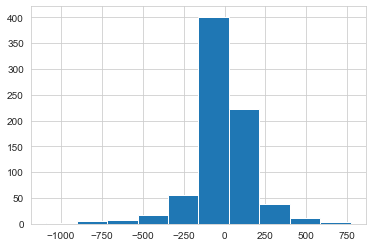

In [171]:
first_period_negative_diff['Monthly_Balance'].hist()

/var/folders/rm/1g600byx25b_ht2r9ty6b4_00000gn/T/ipykernel_25995/1964871615.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  first_period_negative_diff.hist(ax=ax)


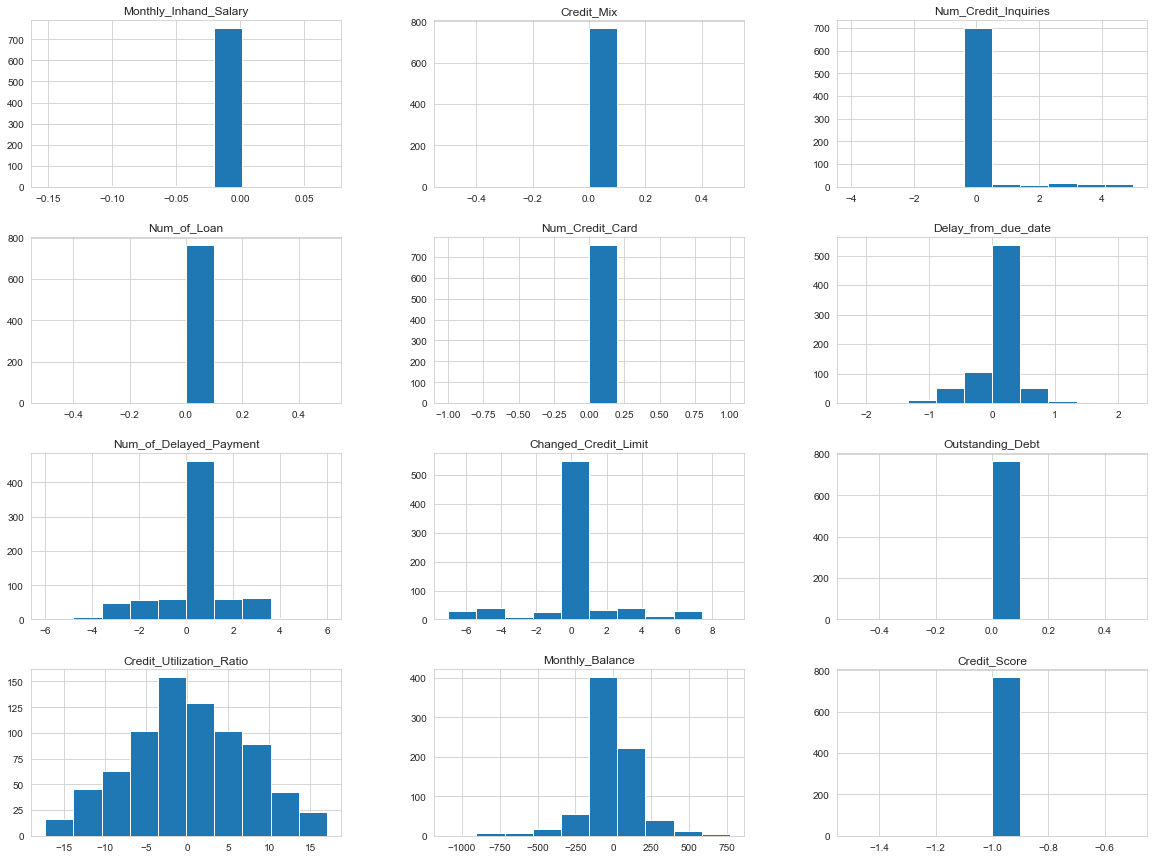

In [172]:
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
first_period_negative_diff.hist(ax=ax)
fig.savefig('./first_diff_of_negatively_changed_credit_score_in_first_period.png')
plt.show()

> 위 분포도가 의미하는 것은 무엇이냐?
- 대부분의 경우 1개월의 변동이기 때문에, 변동 사항이 있기 힘듦. 있다고 하더라도 어떻게 받아들여야할 지 모르겠음.
- 다만 드라마틱한 변화가 있다면, `credit score` 등급 하락에 엄청 유의미한 변수일 것임
- [ 월급, 대출 개수, 신카 개수, 빚 액수 ]는 1개월간 변화가 없었음. 시계열의 1차분의 값이 0에 몰려있음.
       -- 무슨 의미냐? 변동사항이 없다는 소리지
- Credit_Utilization_Ratio(한도 대비 사용한 금액의 비율)를 제외한 모든 컬럼의 데이터가 대부분 0에 분포하고 있음.
- Credit_Utilization_Ratio(한도 대비 사용한 금액의 비율)의 경우 대칭적인 분포의 모습이 나타나는데, 이 단편적인 면만 봤을 때는 credit score의 하락과 상관없이 랜덤하게 거의 독립적으로 변했다는 것을 시사함
- 신용등급이 하락함에 따라 Monthly Balance 같은 경우가 전월 대비 줄어드는 경향이 있음


##### 신용 상승이 있었는가?

In [175]:
first_period_positively_changed = credit_changes[:, 0] == 1
first_period_positively_changed
first_period_positively_changed_customer_series = pd.Series(first_period_positively_changed, index=customer_id)
first_period_positively_changed_customer_series

Customer_ID
1006     False
1007     False
1008     False
1009     False
1011     False
         ...  
50984    False
50990    False
50992    False
50996    False
50999    False
Length: 12500, dtype: bool

In [176]:
(first_period_positively_changed==1).sum()

850

변동 케이스는 신용하락보다 더 많다

In [177]:
first_period_positively_changed_customer_id = first_period_positively_changed_customer_series.loc[ first_period_positively_changed == 1 ].index
first_period_positively_changed_customer_id

Int64Index([ 1017,  1019,  1140,  1189,  1191,  1355,  1529,  1625,  1673,
             1686,
            ...
            50043, 50191, 50223, 50250, 50327, 50451, 50523, 50643, 50730,
            50874],
           dtype='int64', name='Customer_ID', length=850)

In [178]:
first_period_positively_changed_df = cleaned_df.loc[ cleaned_df['Customer_ID'].isin(first_period_positively_changed_customer_id), : ].copy()
first_period_positively_changed_df

,ID,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,DebtConsolidationLoan,HomeEquityLoan,MortgageLoan,NoData,NotSpecified,PaydayLoan,PersonalLoan,StudentLoan,Credit_Score,credit_ever_changes
8,5646,8625,1,20,Teacher,34847.84,8.018950,2.0,4.0,6.0,...,0,0,0,0,0,0,0,0,1,1
9,5647,8625,2,20,Teacher,34847.84,8.018950,2.0,4.0,6.0,...,0,0,0,0,0,0,0,0,2,1
10,5648,8625,3,20,Teacher,34847.84,8.018950,2.0,4.0,6.0,...,0,0,0,0,0,0,0,0,1,1
11,5649,8625,4,20,Teacher,34847.84,8.018950,2.0,4.0,6.0,...,0,0,0,0,0,0,0,0,2,1
12,5650,8625,5,20,Teacher,34847.84,8.018950,2.0,4.0,6.0,...,0,0,0,0,0,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,20,Mechanic,39628.99,8.119522,4.0,6.0,7.0,...,0,0,0,0,0,0,0,1,0,1
99996,155626,37932,5,20,Mechanic,39628.99,8.119522,4.0,6.0,7.0,...,0,0,0,0,0,0,0,1,0,1
99997,155627,37932,6,20,Mechanic,39628.99,8.119522,4.0,6.0,7.0,...,0,0,0,0,0,0,0,1,0,1
99998,155628,37932,7,20,Mechanic,39628.99,8.119522,4.0,6.0,7.0,...,0,0,0,0,0,0,0,1,1,1


In [179]:
positive = first_period_positively_changed_df.groupby('Customer_ID')[
    ['Monthly_Inhand_Salary', 'Credit_Mix', 'Num_Credit_Inquiries', 'Num_of_Loan', 'Num_Credit_Card',
     'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Outstanding_Debt',
     'Credit_Utilization_Ratio', 'Monthly_Balance', 'Credit_Score']].apply(lambda x: x[:2])

positive.columns

Index(['Monthly_Inhand_Salary', 'Credit_Mix', 'Num_Credit_Inquiries',
       'Num_of_Loan', 'Num_Credit_Card', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Monthly_Balance', 'Credit_Score'],
      dtype='object')

In [181]:
positive['Credit_Mix'].value_counts()

Good        776
Bad         600
Standard    324
Name: Credit_Mix, dtype: int64

In [182]:
positive['Credit_Mix'] = positive['Credit_Mix'].map(credit_mix_dict)
positive['Credit_Mix']

Customer_ID       
1017         54520    0
             54521    0
1019         61616    2
             61617    2
1140         92096    2
                     ..
50643        25825    2
50730        71368    0
             71369    0
50874        78528    1
             78529    1
Name: Credit_Mix, Length: 1700, dtype: int64

In [183]:
first_period_positive_diff = positive.groupby('Customer_ID').diff().dropna()
first_period_positive_diff

,,Monthly_Inhand_Salary,Credit_Mix,Num_Credit_Inquiries,Num_of_Loan,Num_Credit_Card,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Outstanding_Debt,Credit_Utilization_Ratio,Monthly_Balance,Credit_Score
Customer_ID,,,,,,,,,,,,,
1017,54521,0.0,0.0,0.0,0.0,0.0,-0.445787,2.0,0.0,0.0,3.798033,65.326804,1.0
1019,61617,0.0,0.0,0.0,0.0,0.0,0.236068,0.0,0.0,0.0,-8.087328,46.165238,1.0
1140,92097,0.0,0.0,0.0,0.0,0.0,-0.236068,0.0,0.0,0.0,-3.878390,223.429061,1.0
1189,23945,0.0,0.0,0.0,0.0,0.0,-0.182676,-3.0,0.0,0.0,8.837528,-603.801367,1.0
1191,28201,0.0,0.0,0.0,0.0,0.0,-0.075811,0.0,0.0,0.0,-1.781320,-36.874159,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50451,52393,0.0,0.0,0.0,0.0,0.0,-0.194477,0.0,0.0,0.0,0.864744,-31.936513,1.0
50523,91393,0.0,0.0,0.0,0.0,0.0,-0.338732,3.0,0.0,0.0,1.738870,147.649896,1.0
50643,25825,0.0,0.0,1.0,0.0,0.0,0.092061,2.0,3.0,0.0,-2.527215,826.996188,1.0


In [184]:
(first_period_positive_diff['Delay_from_due_date'] == 0.0).sum()

454

<AxesSubplot:>

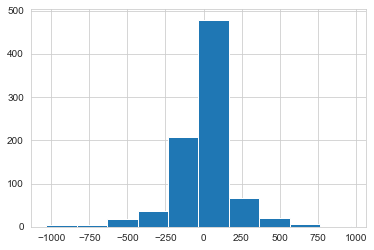

In [185]:
first_period_positive_diff['Monthly_Balance'].hist()

/var/folders/rm/1g600byx25b_ht2r9ty6b4_00000gn/T/ipykernel_25995/2503016755.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  first_period_positive_diff.hist(color='Green', ax=ax)


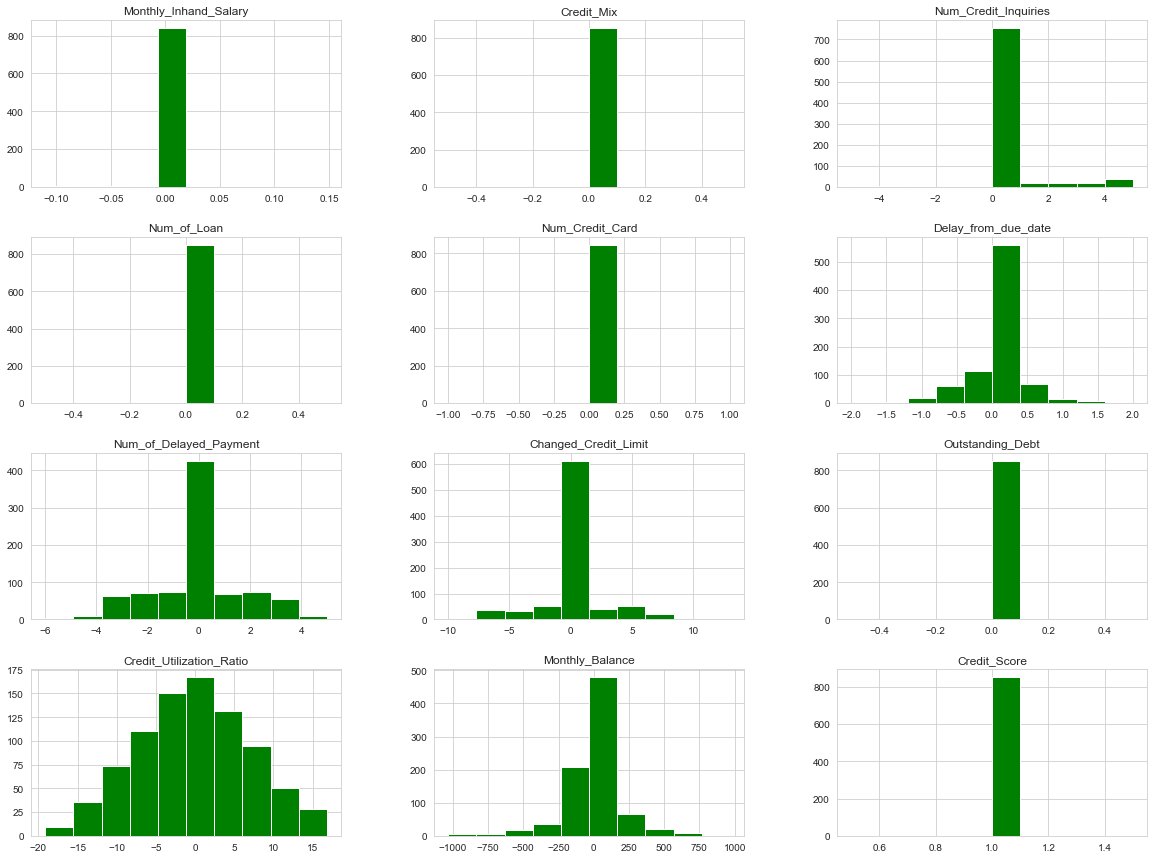

In [187]:
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
first_period_positive_diff.hist(color='Green', ax=ax)
fig.savefig('./first_diff_of_positively_changed_credit_score_in_first_period.png')
plt.show()

In [188]:
first_period_positive_diff['Monthly_Balance'].mean()

-1.739876936207521

### 5) 유의미한 컬럼 추출

In [39]:
cleaned_df['Credit_Score'].map(idx2label)

0            Good
1            Good
2            Good
3            Good
4            Good
           ...   
99995        Poor
99996        Poor
99997        Poor
99998    Standard
99999        Poor
Name: Credit_Score, Length: 100000, dtype: object

카테고리 별 컬럼 리스트 생성

In [40]:
income_cols = ['Annual_Income', 'Monthly_Inhand_Salary', 'Monthly_Balance']  # 소득 및 가용 가능 금액
inv_cols = ['Amount_invested_monthly'] # 투자 지출
debt_cols = ['Delay_from_due_date', 'Num_of_Delayed_Payment', 'Outstanding_Debt',
             'Total_EMI_per_month'] # 부채 관련
credit_cols = ['Num_Bank_Accounts', 'Num_Credit_Card', 'Changed_Credit_Limit', 'Num_Credit_Inquiries',
               'Credit_Mix', 'Credit_Utilization_Ratio'] #
loan_cols = ['Num_of_Loan']

In [41]:
total_cols = income_cols + inv_cols + debt_cols + credit_cols + loan_cols
print(total_cols)
total_len = len(income_cols + inv_cols + debt_cols + credit_cols + loan_cols)
total_len

['Annual_Income', 'Monthly_Inhand_Salary', 'Monthly_Balance', 'Amount_invested_monthly', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Outstanding_Debt', 'Total_EMI_per_month', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix', 'Credit_Utilization_Ratio', 'Num_of_Loan']


15

신용 등급에 변화가 있는 고객들과 일정했던 고객과의 차이점은 ? 다양한 카테고리 확인

In [42]:
cleaned_df.groupby('credit_ever_changes')[total_cols].mean()

/var/folders/rm/1g600byx25b_ht2r9ty6b4_00000gn/T/ipykernel_25995/2591850281.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cleaned_df.groupby('credit_ever_changes')[total_cols].mean()


,Annual_Income,Monthly_Inhand_Salary,Monthly_Balance,Amount_invested_monthly,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Total_EMI_per_month,Num_Bank_Accounts,Num_Credit_Card,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Utilization_Ratio,Num_of_Loan
credit_ever_changes,,,,,,,,,,,,,,
0,47876.009929,3984.374448,388.300949,53.101689,20.437476,13.628432,1331.018694,96.503998,5.470646,5.435844,11.281379,5.500552,32.205258,3.422619
1,52382.855650,4349.322999,395.837697,56.529463,21.541312,13.087922,1494.214117,115.694909,5.296095,5.603367,9.891061,6.010868,32.342248,3.611629


이런 시계열적 특성은 크게 의미가 없을 수 있음. 그리고 미래 데이터에 대해서 credit_ever_changes를 사용할 수가 없음.. 뭉터기로 데이터가 들어올텐데, 타겟값에 대해서 알 수가 없으니.. 이건 feature로 활용은 불가능하고, 시각화나 EDA목적에서만 사용 가능

## 5. 데이터 전처리

### 1) Age 구간화

In [49]:
cleaned_df['Age'].describe()

count    100000.000000
mean         33.316340
std          10.764812
min          14.000000
25%          24.000000
50%          33.000000
75%          42.000000
max          56.000000
Name: Age, dtype: float64

In [50]:
age_range = [10, 20, 30, 40, 50, 60]
age_labels = [10, 20, 30, 40, 50]
age_bins = pd.cut(cleaned_df['Age'], bins=age_range, labels=age_labels)
age_bins.describe()

count     100000
unique         5
top           30
freq       28968
Name: Age, dtype: int64

In [51]:
age_bins

0        20
1        20
2        20
3        20
4        20
         ..
99995    20
99996    20
99997    20
99998    20
99999    20
Name: Age, Length: 100000, dtype: category
Categories (5, int64): [10 < 20 < 30 < 40 < 50]

(array([14003.,     0., 28793.,     0.,     0., 28968.,     0., 21006.,
            0.,  7230.]),
 array([10., 14., 18., 22., 26., 30., 34., 38., 42., 46., 50.]),
 <BarContainer object of 10 artists>)

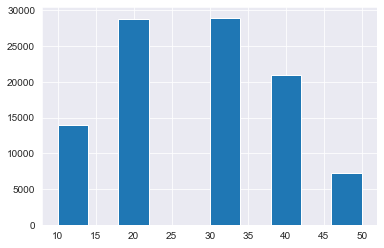

In [52]:
plt.hist(age_bins)

In [53]:
cleaned_df['Age'] = age_bins
cleaned_df['Age']

0        20
1        20
2        20
3        20
4        20
         ..
99995    20
99996    20
99997    20
99998    20
99999    20
Name: Age, Length: 100000, dtype: category
Categories (5, int64): [10 < 20 < 30 < 40 < 50]

In [54]:
age_df = pd.DataFrame(cleaned_df.groupby('Age')['Credit_Score'].value_counts())
age_df

Credit_Score
Age Credit_Score              
10  1                     7331
    0                     5165
    2                     1507
20  1                    15216
    0                     8987
    2                     4590
30  1                    15295
    0                     8794
    2                     4879
40  1                    11355
    0                     5204
    2                     4447
50  1                     3977
    2                     2405
    0                      848

In [55]:
display(pd.DataFrame(cleaned_df.groupby('Age')['Credit_Score'].value_counts().unstack()))
print(pd.DataFrame(cleaned_df.groupby('Age')['Credit_Score'].value_counts().unstack()).columns)
print(pd.DataFrame(cleaned_df.groupby('Age')['Credit_Score'].value_counts().unstack()).index)

Credit_Score,0,1,2
Age,,,
10,5165,7331,1507
20,8987,15216,4590
30,8794,15295,4879
40,5204,11355,4447
50,848,3977,2405


Int64Index([0, 1, 2], dtype='int64', name='Credit_Score')
CategoricalIndex([10, 20, 30, 40, 50], categories=[10, 20, 30, 40, 50], ordered=True, dtype='category', name='Age')


In [56]:
dfu = pd.DataFrame(cleaned_df.groupby('Age')['Credit_Score'].value_counts().unstack())
dfu.columns = list(map(lambda x: idx2label[x], dfu.columns))
dfu

,Poor,Standard,Good
Age,,,
10,5165,7331,1507
20,8987,15216,4590
30,8794,15295,4879
40,5204,11355,4447
50,848,3977,2405


In [57]:
dfu_percentage = pd.DataFrame(cleaned_df.groupby('Age')['Credit_Score'].value_counts().unstack())
dfu_percentage

Credit_Score,0,1,2
Age,,,
10,5165,7331,1507
20,8987,15216,4590
30,8794,15295,4879
40,5204,11355,4447
50,848,3977,2405


In [58]:
dfu.sum(axis=1)
dfu_percentage = dfu.T.apply(lambda x : np.round(x/x.sum(), 3))
dfu_percentage

Age,10,20,30,40,50
Poor,0.369,0.312,0.304,0.248,0.117
Standard,0.524,0.528,0.528,0.541,0.550
Good,0.108,0.159,0.168,0.212,0.333


#### Credit Score by Age

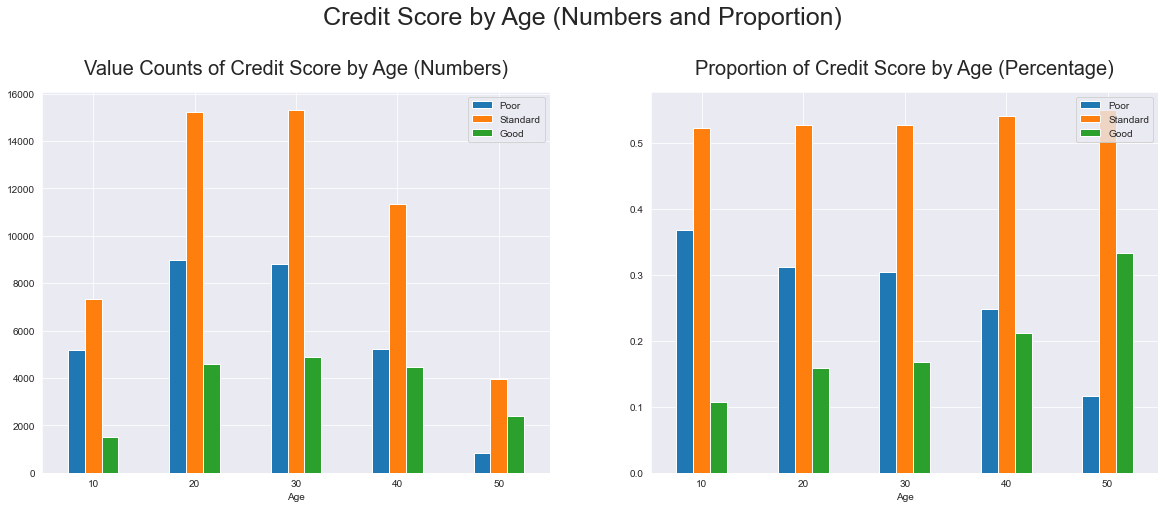

In [59]:
fig, ax = plt.subplots(1, 2, figsize=(20, 7))
dfu.plot(kind='bar', ax=ax[0])
ax[0].tick_params(labelrotation=0)
ax[0].set_title('Value Counts of Credit Score by Age (Numbers)', fontsize=20, y=1.03)

dfu_percentage.T.plot(kind='bar', ax=ax[1])
ax[1].tick_params(labelrotation=0)
ax[1].set_title('Proportion of Credit Score by Age (Percentage)', fontsize=20, y=1.03)

fig.suptitle('Credit Score by Age (Numbers and Proportion)', fontsize=25, y=1.05)

plt.show()

### 2) 전처리전 단변량 분석

/var/folders/rm/1g600byx25b_ht2r9ty6b4_00000gn/T/ipykernel_25995/1902789764.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  cleaned_df[total_cols].hist(ax=ax)


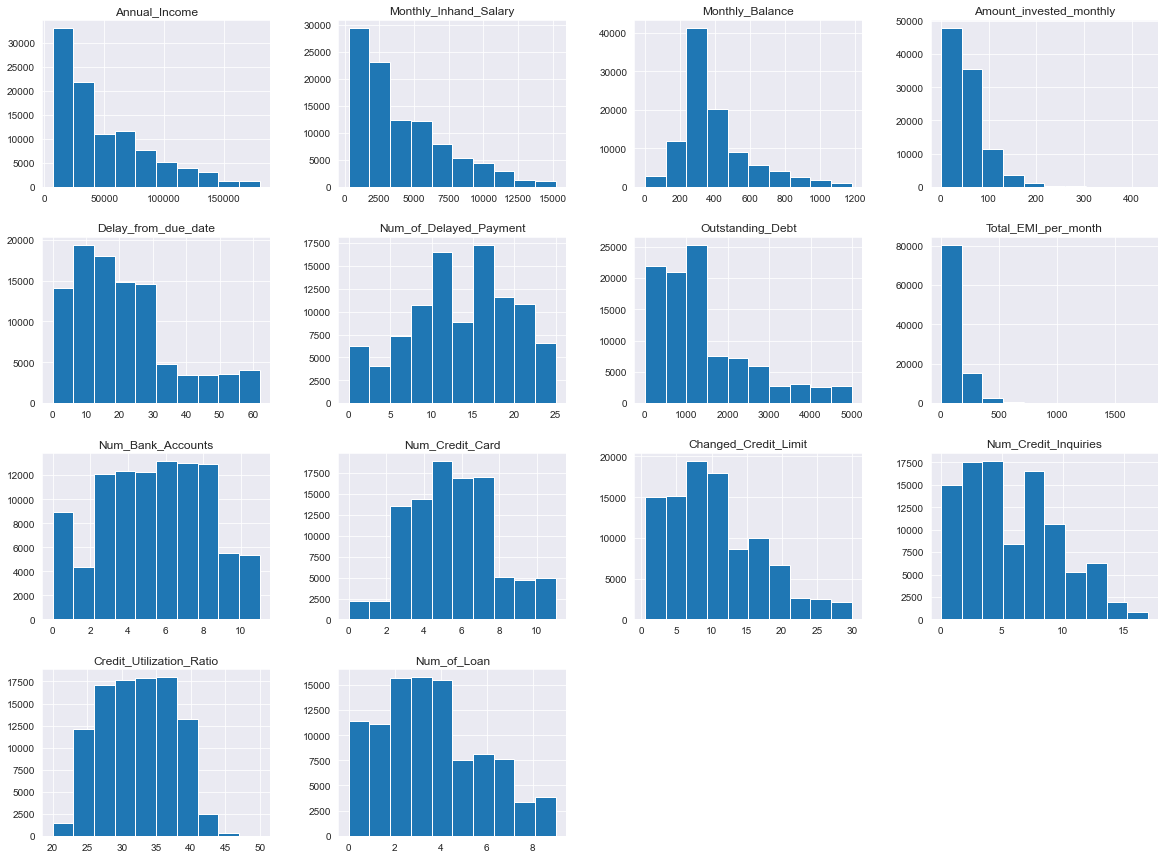

In [60]:
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
cleaned_df[total_cols].hist(ax=ax)
plt.show()

In [61]:
print((cleaned_df['Monthly_Inhand_Salary'] == 0).sum())
print((cleaned_df['Annual_Income'] == 0).sum())
print((cleaned_df['Amount_invested_monthly'] == 0).sum())
print((cleaned_df['Changed_Credit_Limit'] == 0).sum())

0
0
1920
0


- 다행히 월급이나 연봉이 0인 사람은 없다. -> 로그 변환 가능 right skewness완화 시킬 수 있음
- 투자금이 0인 사람은 있음. -> `sqrt`로 변환

<AxesSubplot:>

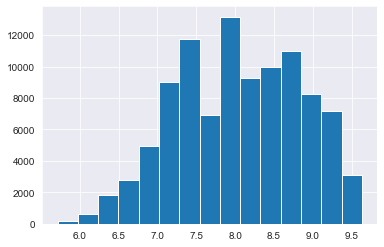

In [63]:
np.log(cleaned_df['Monthly_Inhand_Salary']).hist(bins=15)

<AxesSubplot:>

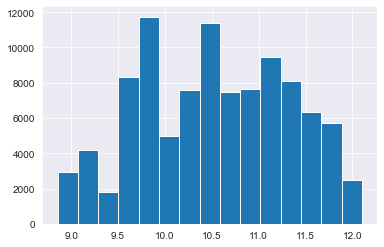

In [64]:
np.log(cleaned_df['Annual_Income']).hist(bins=15)

<AxesSubplot:>

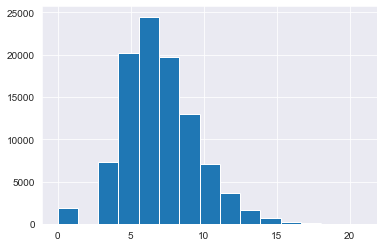

In [65]:
np.sqrt(cleaned_df['Amount_invested_monthly']).hist(bins=15)

<AxesSubplot:>

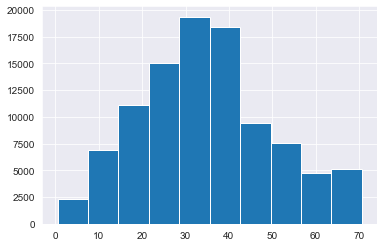

In [66]:
np.sqrt(cleaned_df['Outstanding_Debt']).hist(bins=10)

<AxesSubplot:>

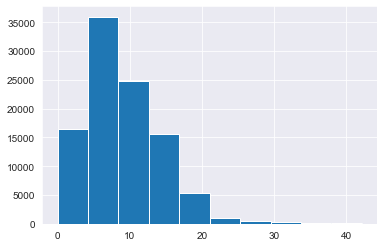

In [67]:
np.sqrt(cleaned_df['Total_EMI_per_month']).hist(bins=10)

<AxesSubplot:>

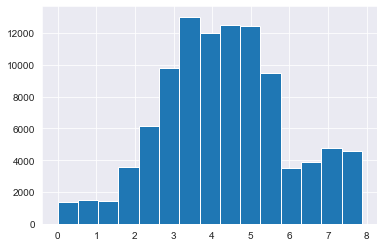

In [68]:
np.sqrt(cleaned_df['Delay_from_due_date']).hist(bins=15)

In [69]:
cleaned_df['Changed_Credit_Limit'].describe()

count    100000.000000
mean         10.470323
std           6.609481
min           0.500000
25%           5.380000
50%           9.400000
75%          14.850000
max          29.980000
Name: Changed_Credit_Limit, dtype: float64

### 2-2) Histograms

In [70]:
# 1차 정제 데이터 따로 빼둘것
fo_df = cleaned_df.copy()

In [71]:
cleaned_df['Monthly_Inhand_Salary'] = np.log(cleaned_df['Monthly_Inhand_Salary'])
cleaned_df['Amount_invested_monthly'] = np.sqrt(cleaned_df['Amount_invested_monthly'])
cleaned_df['Outstanding_Debt'] = np.sqrt(cleaned_df['Outstanding_Debt'])
cleaned_df['Delay_from_due_date'] = np.sqrt(cleaned_df['Delay_from_due_date'])

In [72]:
cleaned_df[income_cols]

,Annual_Income,Monthly_Inhand_Salary,Monthly_Balance
0,19114.12,7.509249,312.494089
1,19114.12,7.509249,284.629162
2,19114.12,7.509249,331.209863
3,19114.12,7.509249,223.451310
4,19114.12,7.509249,341.489231
...,...,...,...
99995,39628.99,8.119522,479.866228
99996,39628.99,8.119522,496.651610
99997,39628.99,8.119522,516.809083
99998,39628.99,8.119522,319.164979


<Figure size 1296x432 with 0 Axes>

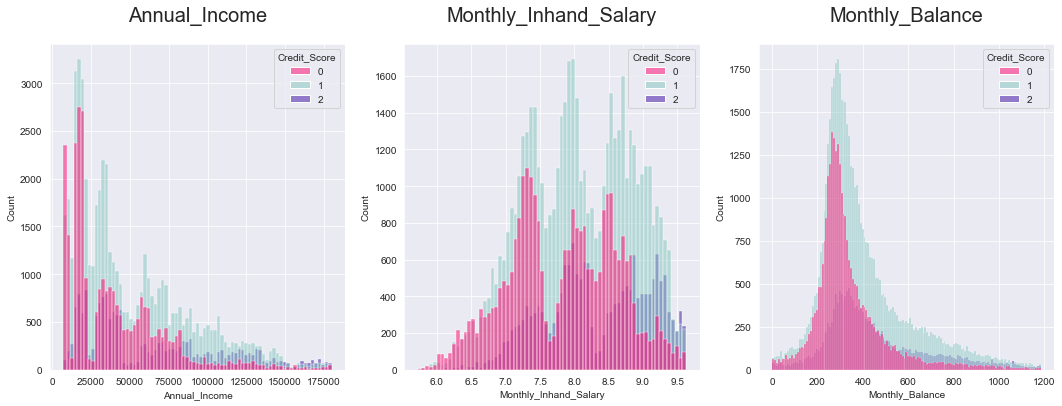

In [73]:
# income columns
n = len(income_cols)
i = 0

plt.figure(figsize=(18,6))
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
for col in income_cols:
    sns.histplot(x=col, data=cleaned_df, hue='Credit_Score', palette=["#ff006e", "#83c5be", "#3a0ca3"], ax=ax[i])
    ax[i].set_title(col, fontsize=20, y=1.05)
    i += 1

plt.show()

<Figure size 1296x432 with 0 Axes>

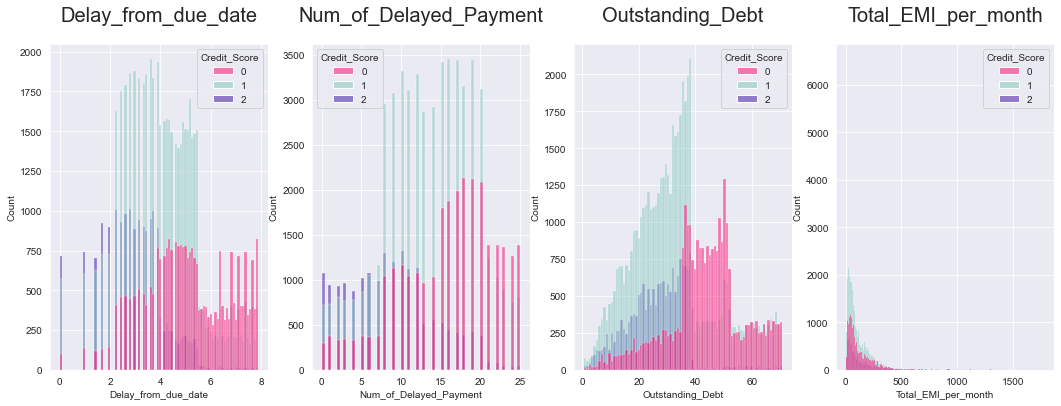

In [74]:
n = len(debt_cols)
i = 0

plt.figure(figsize=(18,6))
fig, ax = plt.subplots(1, n, figsize=(18, 6))
for col in debt_cols:
    sns.histplot(x=col, data=cleaned_df, hue='Credit_Score', palette=["#ff006e", "#83c5be", "#3a0ca3"], ax=ax[i])
    ax[i].set_title(col, fontsize=20, y=1.05)
    i += 1

plt.show()

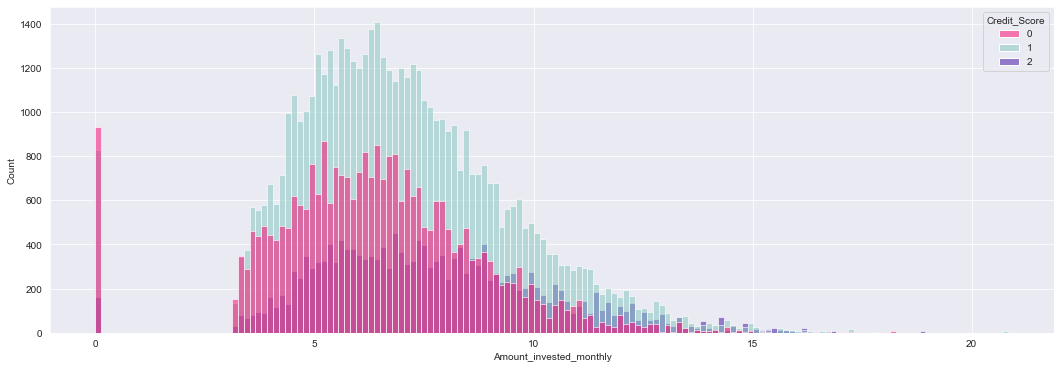

In [75]:
n = len(inv_cols)
i = 0

fig, ax = plt.subplots(1, n, figsize=(18, 6))
for col in inv_cols:
    if n >= 2:
        sns.histplot(x=col, data=cleaned_df, hue='Credit_Score', palette=["#ff006e", "#83c5be", "#3a0ca3"], ax=ax[i])
        ax[i].set_title(col, fontsize=20, y=1.05)
    else:
        sns.histplot(x=col, data=cleaned_df, hue='Credit_Score', palette=["#ff006e", "#83c5be", "#3a0ca3"], ax=ax)
    i += 1

plt.show()

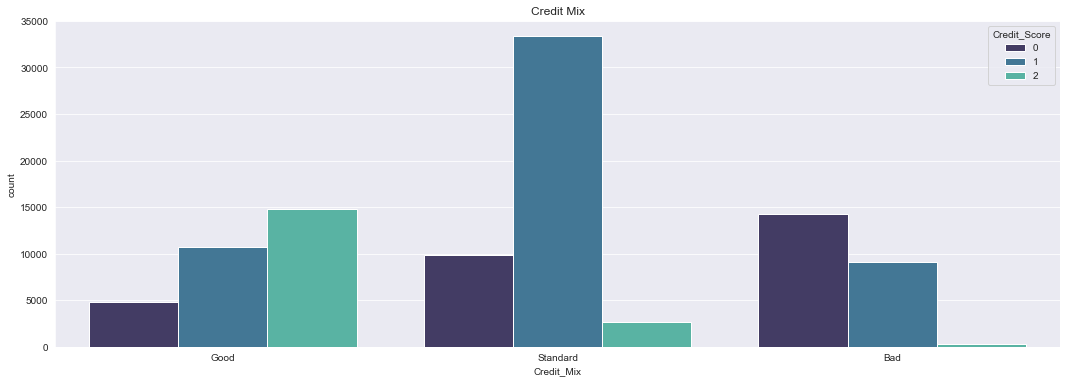

In [76]:
# Credit Mix

plt.figure(figsize=(18, 6))
sns.countplot(x='Credit_Mix',data=cleaned_df, palette="mako", hue="Credit_Score")
plt.title('Credit Mix')
plt.show()

너무 당연함... 악성 크레딧을 갖고 있을수록 신용등급이 bad, 그렇지 않다면 Good 이겠지.. 딱 그 순서대로 나열되어 있음

In [77]:
total_cols + ['Credit_Score']

['Annual_Income',
 'Monthly_Inhand_Salary',
 'Monthly_Balance',
 'Amount_invested_monthly',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Outstanding_Debt',
 'Total_EMI_per_month',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Credit_Mix',
 'Credit_Utilization_Ratio',
 'Num_of_Loan',
 'Credit_Score']

### 3) 변수 상관관계 확인

In [78]:
corr = cleaned_df[total_cols + ['Credit_Score']].corr()

/var/folders/rm/1g600byx25b_ht2r9ty6b4_00000gn/T/ipykernel_25995/1878205077.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = cleaned_df[total_cols + ['Credit_Score']].corr()


In [79]:
corr

,Annual_Income,Monthly_Inhand_Salary,Monthly_Balance,Amount_invested_monthly,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Total_EMI_per_month,Num_Bank_Accounts,Num_Credit_Card,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Utilization_Ratio,Num_of_Loan,Credit_Score
Annual_Income,1.000000,0.921573,0.625640,0.799632,-0.254528,-0.286297,-0.265563,0.438106,-0.284060,-0.217852,-0.176353,-0.280242,0.175930,-0.255560,0.212606
Monthly_Inhand_Salary,0.921573,1.000000,0.572300,0.805513,-0.250402,-0.272591,-0.274864,0.433019,-0.277453,-0.220001,-0.175220,-0.282704,0.150949,-0.262164,0.210630
Monthly_Balance,0.625640,0.572300,1.000000,0.474450,-0.269771,-0.286045,-0.305864,0.071370,-0.286709,-0.231913,-0.198706,-0.314332,0.224729,-0.429416,0.197728
Amount_invested_monthly,0.799632,0.805513,0.474450,1.000000,-0.211104,-0.232105,-0.226008,0.363116,-0.233728,-0.184190,-0.147467,-0.231568,0.130491,-0.224309,0.175981
Delay_from_due_date,-0.254528,-0.250402,-0.269771,-0.211104,1.000000,0.560363,0.529590,0.069673,0.572435,0.470508,0.306288,0.526304,-0.064377,0.483230,-0.440932
Num_of_Delayed_Payment,-0.286297,-0.272591,-0.286045,-0.232105,0.560363,1.000000,0.484612,0.053653,0.601842,0.423300,0.329311,0.499689,-0.073774,0.473919,-0.372978
Outstanding_Debt,-0.265563,-0.274864,-0.305864,-0.226008,0.529590,0.484612,1.000000,0.096823,0.490411,0.476977,0.416660,0.588375,-0.069926,0.601587,-0.399343
Total_EMI_per_month,0.438106,0.433019,0.071370,0.363116,0.069673,0.053653,0.096823,1.000000,0.050035,0.058853,0.068333,0.100581,0.022365,0.328485,0.016572
Num_Bank_Accounts,-0.284060,-0.277453,-0.286709,-0.233728,0.572435,0.601842,0.490411,0.050035,1.000000,0.442694,0.333794,0.518323,-0.071783,0.472483,-0.388165
Num_Credit_Card,-0.217852,-0.220001,-0.231913,-0.184190,0.470508,0.423300,0.476977,0.058853,0.442694,1.000000,0.255495,0.459429,-0.055249,0.417960,-0.404435


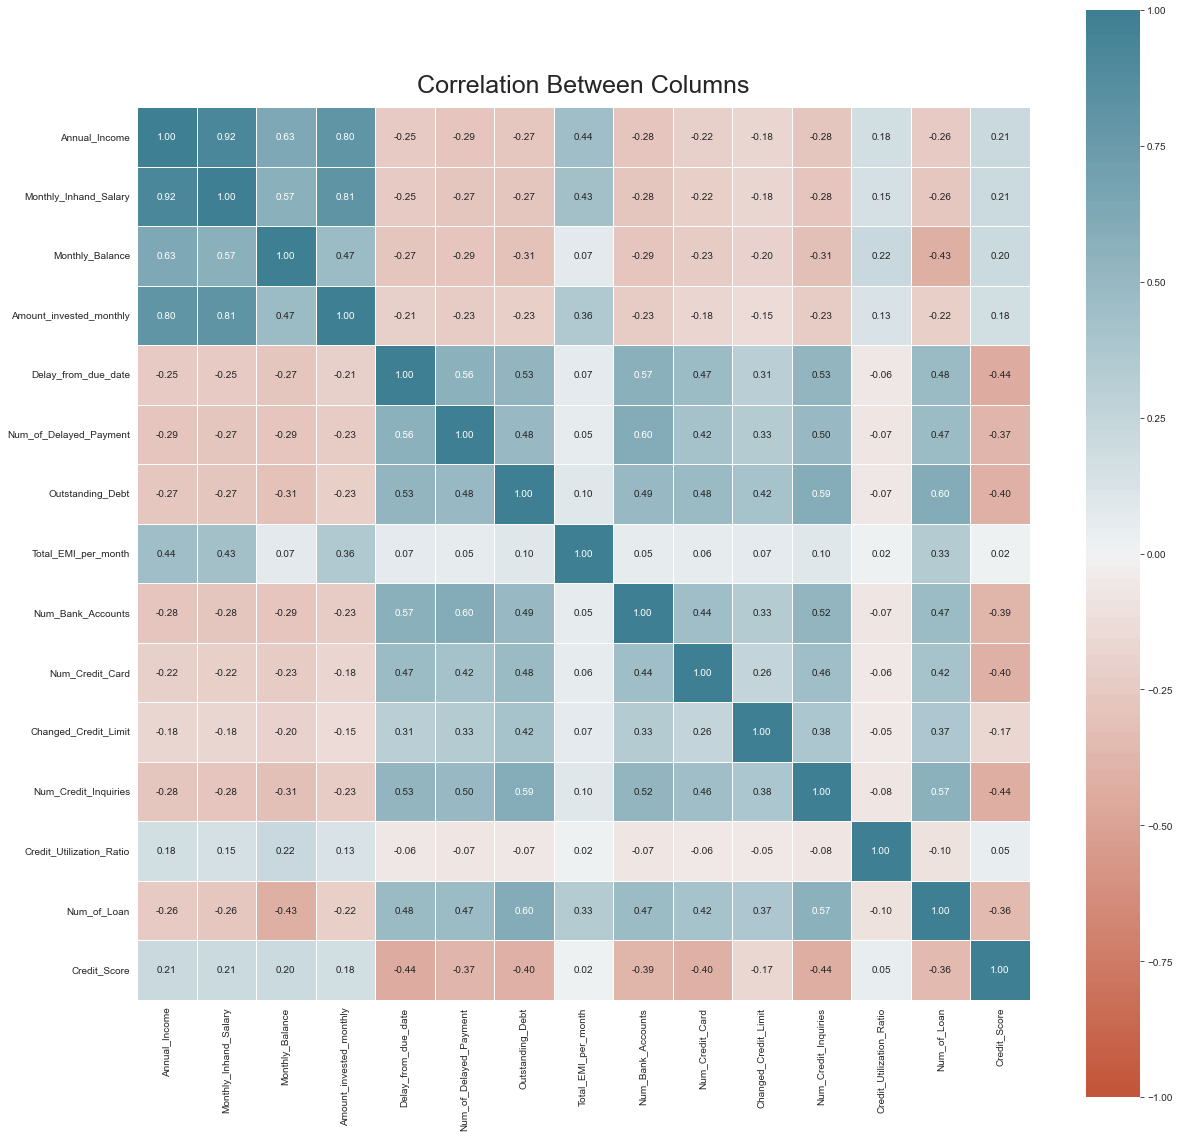

In [80]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(1, 1, figsize=(20, 20))
sns.heatmap(corr,
            vmin=-1, vmax=1, center=0,
            cmap=sns.diverging_palette(20, 220, n=200),
            annot=True,
            fmt='.2f',
            linewidths=1,
            square=True,
            # annot_kws={"fontsize": 10},
            ax=ax)
# sns.set(font_scale=10)
ax.set_title('Correlation Between Columns', fontsize=25, y=1.01)
fig.savefig('./cols_corr.png')

In [81]:
loan_corr = cleaned_df.iloc[:, -11:].corr()
loan_corr

,Credit-BuilderLoan,DebtConsolidationLoan,HomeEquityLoan,MortgageLoan,NoData,NotSpecified,PaydayLoan,PersonalLoan,StudentLoan,Credit_Score,credit_ever_changes
Credit-BuilderLoan,1.000000,0.059062,0.088251,0.074767,-0.217417,0.061945,0.072586,0.071882,0.065310,-0.146575,0.027987
DebtConsolidationLoan,0.059062,1.000000,0.076807,0.068672,-0.215705,0.065886,0.076109,0.072626,0.054802,-0.155630,0.013950
HomeEquityLoan,0.088251,0.076807,1.000000,0.075995,-0.216924,0.070406,0.085833,0.079139,0.064168,-0.147420,0.005402
MortgageLoan,0.074767,0.068672,0.075995,1.000000,-0.217465,0.098111,0.068334,0.078554,0.068855,-0.149826,0.011059
NoData,-0.217417,-0.215705,-0.216924,-0.217465,1.000000,-0.218399,-0.219150,-0.216138,-0.215138,0.157590,-0.002997
NotSpecified,0.061945,0.065886,0.070406,0.098111,-0.218399,1.000000,0.077166,0.065915,0.069831,-0.143519,0.020742
PaydayLoan,0.072586,0.076109,0.085833,0.068334,-0.219150,0.077166,1.000000,0.063978,0.067061,-0.154094,0.025841
PersonalLoan,0.071882,0.072626,0.079139,0.078554,-0.216138,0.065915,0.063978,1.000000,0.067630,-0.148990,0.000323
StudentLoan,0.065310,0.054802,0.064168,0.068855,-0.215138,0.069831,0.067061,0.067630,1.000000,-0.148499,0.017839
Credit_Score,-0.146575,-0.155630,-0.147420,-0.149826,0.157590,-0.143519,-0.154094,-0.148990,-0.148499,1.000000,-0.041278


### - 전처리 전략

In [82]:
cleaned_df

,ID,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,DebtConsolidationLoan,HomeEquityLoan,MortgageLoan,NoData,NotSpecified,PaydayLoan,PersonalLoan,StudentLoan,Credit_Score,credit_ever_changes
0,5634,3392,1,20,Scientist,19114.12,7.509249,3.0,4.0,3.0,...,0,1,0,0,0,0,1,0,2,1
1,5635,3392,2,20,Scientist,19114.12,7.509249,3.0,4.0,3.0,...,0,1,0,0,0,0,1,0,2,1
2,5636,3392,3,20,Scientist,19114.12,7.509249,3.0,4.0,3.0,...,0,1,0,0,0,0,1,0,2,1
3,5637,3392,4,20,Scientist,19114.12,7.509249,3.0,4.0,3.0,...,0,1,0,0,0,0,1,0,2,1
4,5638,3392,5,20,Scientist,19114.12,7.509249,3.0,4.0,3.0,...,0,1,0,0,0,0,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,20,Mechanic,39628.99,8.119522,4.0,6.0,7.0,...,0,0,0,0,0,0,0,1,0,1
99996,155626,37932,5,20,Mechanic,39628.99,8.119522,4.0,6.0,7.0,...,0,0,0,0,0,0,0,1,0,1
99997,155627,37932,6,20,Mechanic,39628.99,8.119522,4.0,6.0,7.0,...,0,0,0,0,0,0,0,1,0,1
99998,155628,37932,7,20,Mechanic,39628.99,8.119522,4.0,6.0,7.0,...,0,0,0,0,0,0,0,1,1,1


In [83]:
cleaned_df['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      28616
High_spent_Medium_value_payments    19738
High_spent_Large_value_payments     14726
Low_spent_Medium_value_payments     14399
High_spent_Small_value_payments     11764
Low_spent_Large_value_payments      10757
Name: Payment_Behaviour, dtype: int64

- Label Encoding : `Occupation`, `Payment_Behaviour`, `Credit_Mix`
- Col Drops : `ID`, `Type_of_Loan`, `Customer_ID` (나중에 데이터 분리 이후에..)